In [ ]:
######################################################################################################
# Modelling Sleep Duration Using Gaussian Processes
# LE49: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
######################################################################################################
# Visualise distributions of sleepduration/step count for various users INDEPENDENTLY; 
# perform Normality test for sleep duration
######################################################################################################
# Conclusion => better not to log transform the data
# some natural processes seem to have values distributed as Normal contrary to the raw values
# based on D’Agostino and Pearson’s [R675], [R676] test 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [2]:
# Take users with 300 or more measurements (after data cleaning)
# Calculate ratio of how many users pass the Normality test with and without log-transform
# Plot sample users' distributions

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io, scipy.stats, scipy.linalg
from numpy.linalg import solve
import glob
from scipy import stats
import time
# %matplotlib inline

t = 'sleepduration' # type of data to extract
min_num_measurements = 300 # => 1264 users

N_users_to_show = 36

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

alpha = 1e-3
# Store counts
N_PASS = 0.   # null hypothesis cannot be rejected <=> likely from Normal distribution
N_FAIL = 0.   # null hypothesis can be rejected    <=> not from Normal distribution

N_LOG_PASS = 0.   # null hypothesis cannot be rejected <=> likely from Normal distribution
N_LOG_FAIL = 0.   # null hypothesis can be rejected    <=> not from Normal distribution



all_data = []

st = time.time()
# cnt = 0
# For each user
for file_name in glob.glob('./../Dataset/clean_' + t + '/*.npz'):
    UID = file_name.split('/')[-1][:-4]
    data = np.load(file_name)['xy']
    
    if len(data) < min_num_measurements:
        continue
        
    ys = data[:,1] # all y values from this user
        
    # Test if from Normal
    _, p = stats.normaltest(ys)
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        N_FAIL += 1. #print("The null hypothesis can be rejected")
    else:
        N_PASS += 1. #print("The null hypothesis cannot be rejected")
        
    _, p = stats.normaltest(np.log(ys))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        N_LOG_FAIL += 1. #print("The null hypothesis can be rejected")
    else:
        N_LOG_PASS += 1. #print("The null hypothesis cannot be rejected")
        
    all_data.append( ys ) 
#     cnt += 1
#     if cnt >= N_users_to_show:
#         break
        
h_data = all_data[:N_users_to_show]
print "Histograms for ", (len(h_data)), "users, out of total ", len(all_data)

##############################################################################################################
# Calculate # users who pass null hypothesis test (can be from Normal) for (a) NOT LOG transformed y; (b) LOG transformed y
print "NOT LOG transform y"
print N_PASS / (N_PASS + N_FAIL), "users' distributions pass <=> likely from Normal distribution"

print "LOG transform y"
print N_LOG_PASS / (N_LOG_PASS + N_LOG_FAIL), "users' distributions pass <=> likely from Normal distribution"
print "======================================================================================"
print (N_PASS / (N_PASS + N_FAIL)) / (N_LOG_PASS / (N_LOG_PASS + N_LOG_FAIL)),"-times more users pass the Normality test when y was not log-transformed"


Histograms for  36 users, out of total  1264
NOT LOG transform y
0.395569620253 users' distributions pass <=> likely from Normal distribution
LOG transform y
0.0886075949367 users' distributions pass <=> likely from Normal distribution
4.46428571429 -times more users pass the Normality test when y was not log-transformed


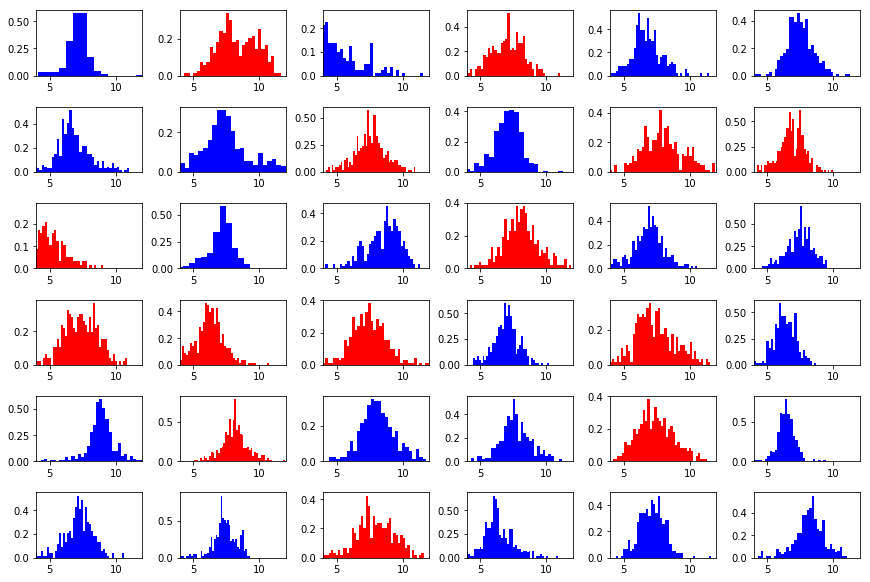

Red: null hypothesis cannot be rejected. alpha = 0.001


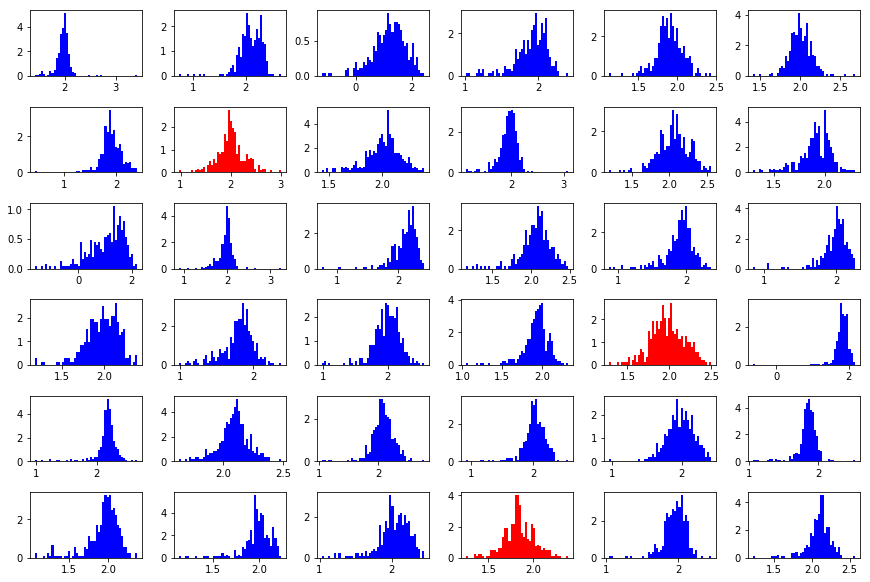

Red: null hypothesis cannot be rejected. alpha = 0.001


In [26]:
##############################################################################################################
# NOT LOG TRANSFORMED y, distributions

with matplotlib.rc_context({'figure.figsize': [2*np.sqrt(N_users_to_show),4*np.sqrt(N_users_to_show)/3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, d in enumerate(h_data):

        ax = fig.add_subplot(np.sqrt(N_users_to_show), np.sqrt(N_users_to_show), i+1)  
        h = sorted(d)
        
        # Test if from Normal
        k2, p = stats.normaltest(d)
        alpha = 1e-3
        #print("p = {:g}".format(p))
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            #print("The null hypothesis can be rejected")
            ax.hist(h, 50, normed=1, color='b')
        else:
            #print("The null hypothesis cannot be rejected")
            ax.hist(h, 50, normed=1, color='r')
            
#         xmin = min(means[i] - 2*stds[i], h[0])
#         xmax = max(means[i] + 2*stds[i], h[-1])
#         rng = np.linspace(xmin, xmax, 200)
#         ax.plot(rng, scipy.stats.norm.pdf(rng, means[i], stds[i]), color='red')
#         ax.hist(h, 50, normed=1)
        ax.set_xlim([4,12])
#         ax.set_title(f'{i}')


    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()
print ("Red: null hypothesis cannot be rejected. alpha = 0.001")
##############################################################################################################
# LOG TRANSFORMED y

# Show 9 users, their distributions
with matplotlib.rc_context({'figure.figsize': [2*np.sqrt(N_users_to_show),4*np.sqrt(N_users_to_show)/3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, d in enumerate(h_data):
        
        ############################
        d = np.log(d)
        ###########################

        ax = fig.add_subplot(np.sqrt(N_users_to_show), np.sqrt(N_users_to_show), i+1)  
        h = sorted(d)
#         xmin = min(means[i] - 2*stds[i], h[0])
#         xmax = max(means[i] + 2*stds[i], h[-1])
#         rng = np.linspace(xmin, xmax, 200)
#         ax.plot(rng, scipy.stats.norm.pdf(rng, means[i], stds[i]), color='red')

        # Test if from Normal
        k2, p = stats.normaltest(d)
        alpha = 1e-3
        #print("p = {:g}".format(p))
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            #print("The null hypothesis can be rejected")
            ax.hist(h, 50, normed=1, color='b')
        else:
            #print("The null hypothesis cannot be rejected")
            ax.hist(h, 50, normed=1, color='r')
#         ax.set_xlim([4,12])
#         ax.set_title(f'{i}')
#         ax.set_xscale('log')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()
print ("Red: null hypothesis cannot be rejected. alpha = 0.001")

36


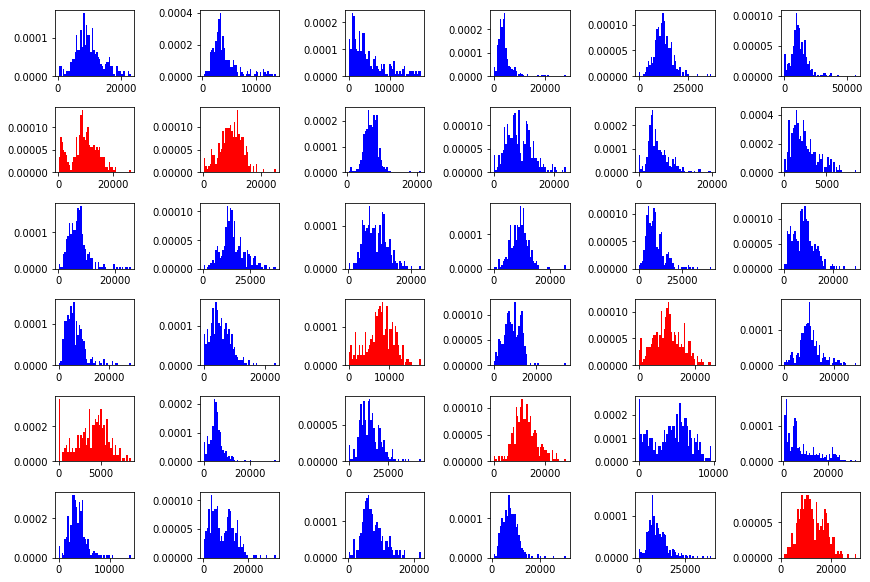

Red: null hypothesis cannot be rejected. alpha = 0.001


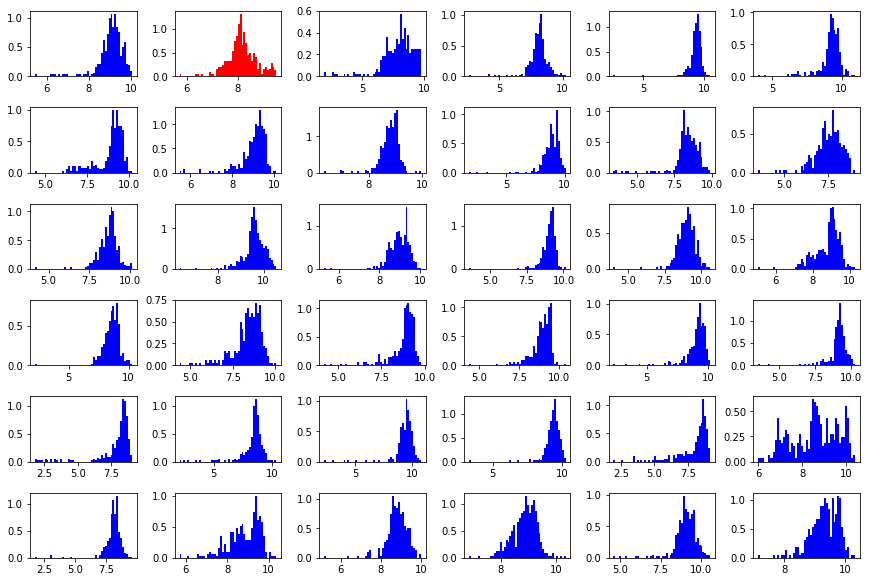

Red: null hypothesis cannot be rejected. alpha = 0.001


In [2]:
##############################################################################################################
# Same for steps
##############################################################################################################
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io, scipy.stats, scipy.linalg
from numpy.linalg import solve
import glob
from scipy import stats
import time
%matplotlib inline

t = 'steps' # type of data to extract
min_num_measurements = 300 #365

N_users_to_show = 36

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

h_data = []

st = time.time()
cnt = 0
# For each user
for file_name in glob.glob('./../Dataset/' + t + '/*.npz'):
    UID = file_name.split('/')[-1][:-4]
    data = np.load(file_name)['xy']
    
    if len(data) < min_num_measurements:
        continue
        
    h_data.append( data[:,1] ) # all y values
    cnt += 1
    if cnt >= N_users_to_show:
        break
print (len(h_data))

# Show 9 users, their distributions
with matplotlib.rc_context({'figure.figsize': [2*np.sqrt(N_users_to_show),4*np.sqrt(N_users_to_show)/3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, d in enumerate(h_data):

        ax = fig.add_subplot(np.sqrt(N_users_to_show), np.sqrt(N_users_to_show), i+1)  
        h = sorted(d)
        
        # Test if from Normal
        k2, p = stats.normaltest(d)
        alpha = 1e-3
        #print("p = {:g}".format(p))
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            #print("The null hypothesis can be rejected")
            ax.hist(h, 50, normed=1, color='b')
        else:
            #print("The null hypothesis cannot be rejected")
            ax.hist(h, 50, normed=1, color='r')
            
#         xmin = min(means[i] - 2*stds[i], h[0])
#         xmax = max(means[i] + 2*stds[i], h[-1])
#         rng = np.linspace(xmin, xmax, 200)
#         ax.plot(rng, scipy.stats.norm.pdf(rng, means[i], stds[i]), color='red')
#         ax.hist(h, 50, normed=1)
#         ax.set_xlim([4,12])
#         ax.set_title(f'{i}')


    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()
print ("Red: null hypothesis cannot be rejected. alpha = 0.001")
##############################################################################################################
# LOG TRANSFORMED y

# Show 9 users, their distributions
with matplotlib.rc_context({'figure.figsize': [2*np.sqrt(N_users_to_show),4*np.sqrt(N_users_to_show)/3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, d in enumerate(h_data):
        
        ############################
        d = np.log(d)
        ###########################

        ax = fig.add_subplot(np.sqrt(N_users_to_show), np.sqrt(N_users_to_show), i+1)  
        h = sorted(d)
#         xmin = min(means[i] - 2*stds[i], h[0])
#         xmax = max(means[i] + 2*stds[i], h[-1])
#         rng = np.linspace(xmin, xmax, 200)
#         ax.plot(rng, scipy.stats.norm.pdf(rng, means[i], stds[i]), color='red')

        # Test if from Normal
        k2, p = stats.normaltest(d)
        alpha = 1e-3
        #print("p = {:g}".format(p))
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            #print("The null hypothesis can be rejected")
            ax.hist(h, 50, normed=1, color='b')
        else:
            #print("The null hypothesis cannot be rejected")
            ax.hist(h, 50, normed=1, color='r')
#         ax.set_xlim([4,12])
#         ax.set_title(f'{i}')
#         ax.set_xscale('log')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()
print ("Red: null hypothesis cannot be rejected. alpha = 0.001")